In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [26]:
from tensorflow.keras.datasets import fashion_mnist

In [27]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [28]:
train_images = train_images/255.0
test_images = test_images/255.0

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [30]:
def model_arch():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  print(model.summary())
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x=train_images, y=train_labels, epochs=10)
  return model

In [31]:
model = model_arch()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5001 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3793 - accuracy: 0.8616
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3426 - accuracy: 0.8741


In [12]:
(test_loss, test_acc )= model.evaluate(test_images, test_labels)
print("Test Accuracy: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.2533 - accuracy: 0.1726
Test Accuracy:  0.17260000109672546


In [13]:
predictions = model.predict(test_images)
predict_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 3ms/step


In [19]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

In [20]:
plt.figure(figsize = (2*2*num_cols, 5*num_rows))

<Figure size 12500x2500 with 0 Axes>

<Figure size 12500x2500 with 0 Axes>

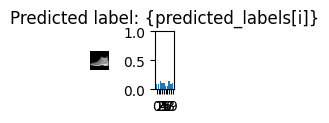

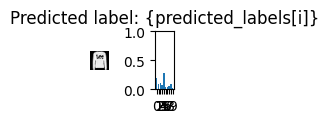

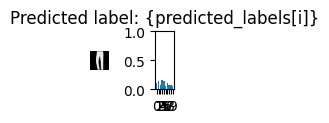

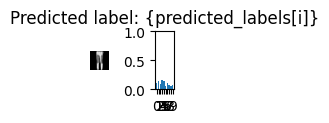

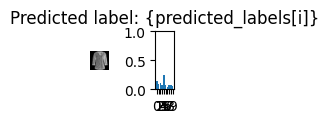

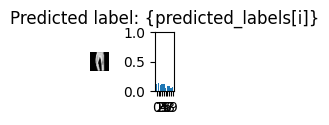

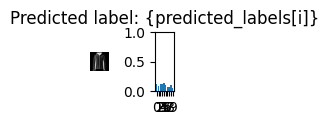

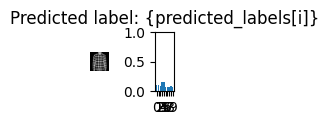

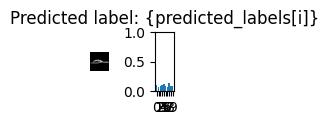

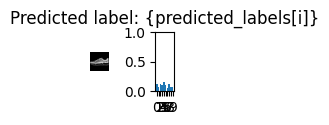

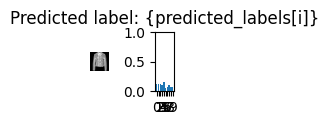

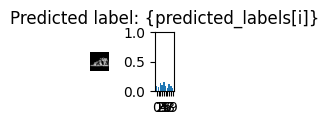

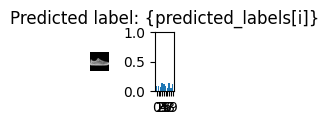

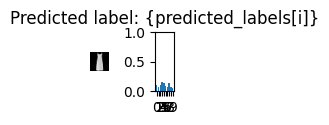

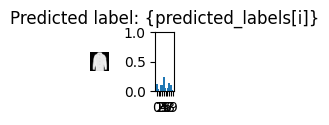

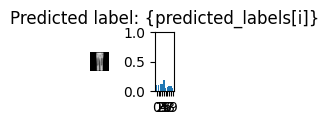

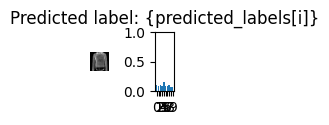

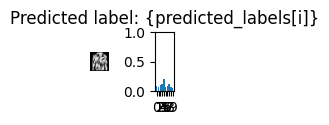

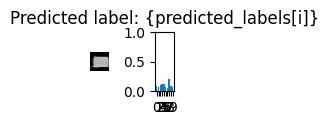

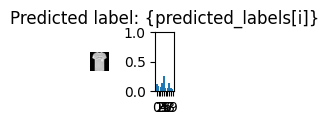

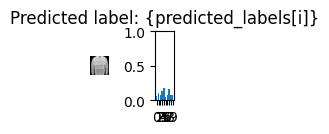

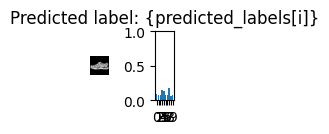

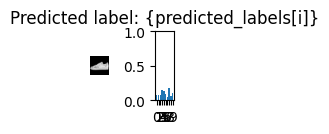

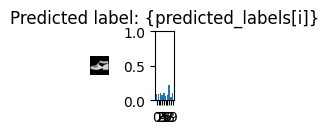

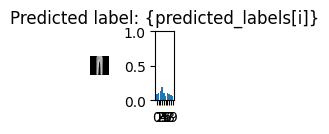

In [24]:
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i + 1)
  plt.imshow(test_images[i], cmap='gray')
  plt.axis('off')
  plt.subplot(num_rows, 2*num_cols, 2*i + 2)
  plt.bar(range(10), predictions[i])
  plt.xticks(range(10))
  plt.ylim([0,1])
  plt.tight_layout()
  plt.title("Predicted label: {predicted_labels[i]}")
  plt.show()
